In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics

In [11]:
data_path="/content/car data.csv"

In [12]:

df=pd.read_csv(data_path)

In [13]:
df.shape

(301, 9)

In [14]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [15]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
print("Shape",df.shape)
print("Number of rows",df.shape[0])
print("Number of columns",df.shape[1])

Shape (301, 9)
Number of rows 301
Number of columns 9


In [17]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [22]:
print(dict(df['Seller_Type'].value_counts()))
print(dict(df['Fuel_Type'].value_counts()))
print(dict(df['Transmission'].value_counts()))

{'Dealer': 195, 'Individual': 106}
{'Petrol': 239, 'Diesel': 60, 'CNG': 2}
{'Manual': 261, 'Automatic': 40}


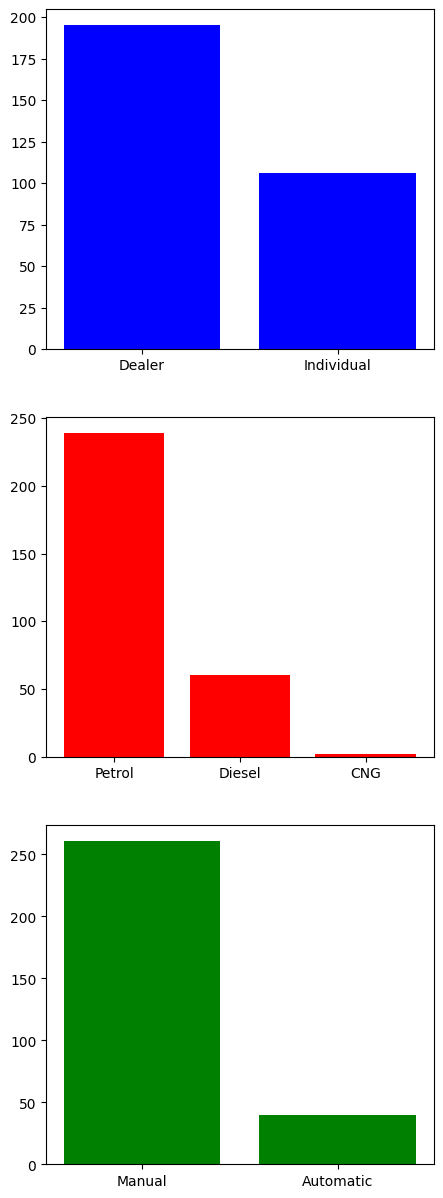

In [40]:
figure_size = (5,15)
figure_dpi = 100
n_rows = 3
n_columns = 1

fig = plt.figure(figsize= figure_size, dpi = figure_dpi)
ax1 = fig.add_subplot(n_rows, n_columns,1)
ax1.bar(dict(df['Seller_Type'].value_counts()).keys(),dict(df['Seller_Type'].value_counts()).values(),color="blue")


ax2= fig.add_subplot(n_rows, n_columns,2)
ax2.bar(dict(df['Fuel_Type'].value_counts()).keys(),dict(df['Fuel_Type'].value_counts()).values(),color="red")

ax3= fig.add_subplot(n_rows, n_columns,3)
ax3.bar(dict(df['Transmission'].value_counts()).keys(),dict(df['Transmission'].value_counts()).values(),color="green")
plt.show()



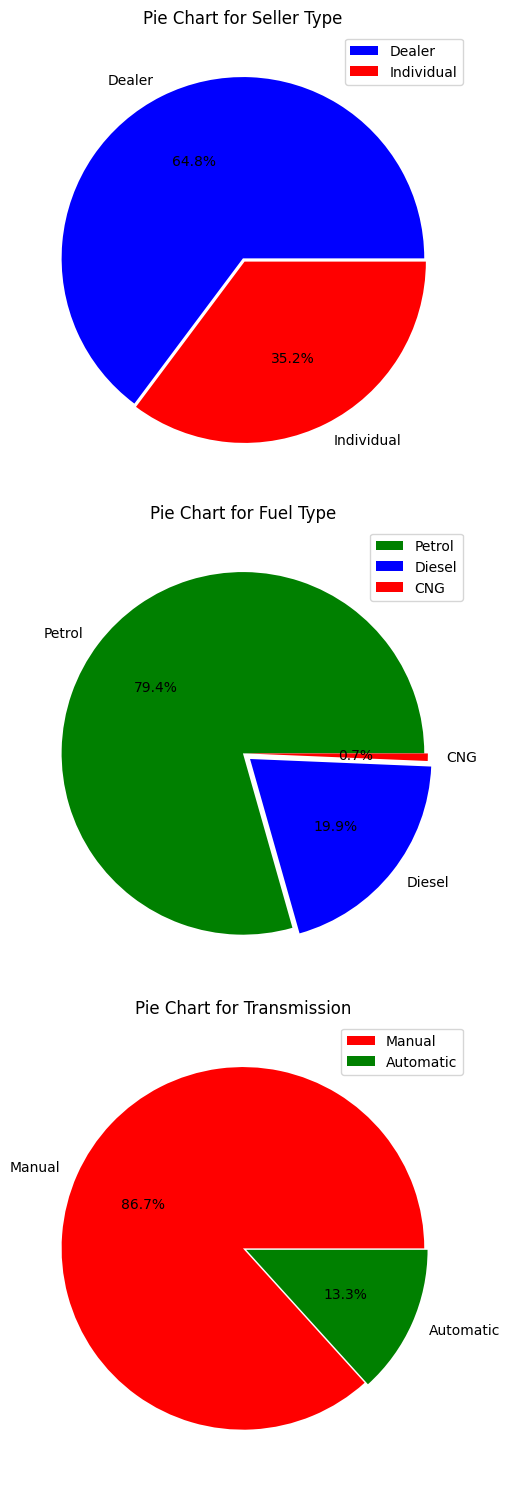

In [49]:
figure_size = (5, 15)
figure_dpi = 100
n_rows = 3
n_columns = 1

fig = plt.figure(figsize=figure_size, dpi=figure_dpi)

# البيانات الخاصة بكل عمود
seller_type_counts = dict(df['Seller_Type'].value_counts())
fuel_type_counts = dict(df['Fuel_Type'].value_counts())
transmission_counts = dict(df['Transmission'].value_counts())

# رسم المخطط الدائري الأول
ax1 = fig.add_subplot(n_rows, n_columns, 1)
ax1.pie(list(seller_type_counts.values()), labels=list(seller_type_counts.keys()), autopct='%1.1f%%',colors=['blue','red'],explode=(0,0.020))
ax1.set_title("Pie Chart for Seller Type")
ax1.legend()

# رسم المخطط الدائري الثاني
ax2 = fig.add_subplot(n_rows, n_columns, 2)
ax2.pie(list(fuel_type_counts.values()), labels=list(fuel_type_counts.keys()), autopct='%1.1f%%',colors=['green','blue','red'],explode=(0,0.050,0.020))
ax2.set_title("Pie Chart for Fuel Type")
ax2.legend()

# رسم المخطط الدائري الثالث
ax3 = fig.add_subplot(n_rows, n_columns, 3)
ax3.pie(list(transmission_counts.values()), labels=list(transmission_counts.keys()), autopct='%1.1f%%',colors=['red','green'],explode=(0,0.020))
ax3.set_title("Pie Chart for Transmission")
ax3.legend()

# عرض المخططات
plt.tight_layout()
plt.show()


In [23]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [67]:
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [68]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [51]:
df['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [70]:
X=df.drop(['Selling_Price','Car_Name'],axis=1)
Y=df['Selling_Price']


In [74]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [75]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [117]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.05,random_state=2)

In [120]:
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

(16, 7)
(285, 7)
(16,)
(285,)


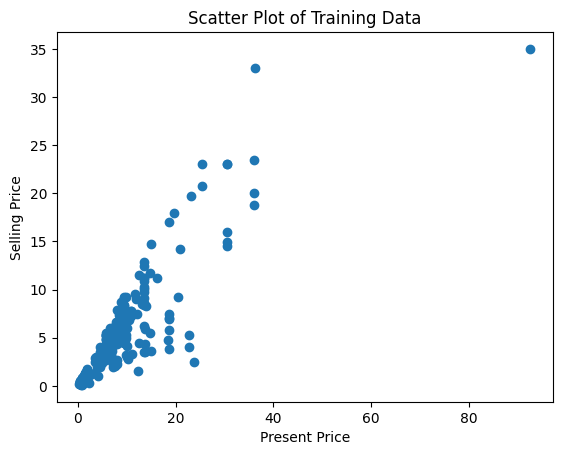

In [121]:

plt.scatter(X_train['Present_Price'], Y_train)
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.title('Scatter Plot of Training Data')
plt.show()


In [122]:
linearRegressionModel = LinearRegression()

In [123]:
linearRegressionModel.fit(X_train,Y_train)

LinearRegression()

In [124]:
y_predicted=linearRegressionModel.predict(X_test)

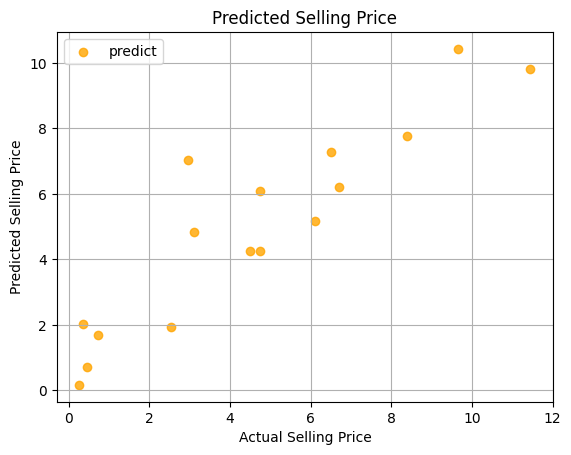

In [125]:
plt.scatter(Y_test, y_predicted,
            color="Orange", label="predict", alpha=0.80)
plt.title("Predicted Selling Price")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.legend()
plt.grid(True)
plt.show()


In [126]:
print('Mean_squared_error',mean_squared_error(y_true=Y_test, y_pred=y_predicted))
print('Mean_absolute_error',metrics.mean_absolute_error(y_true=Y_test, y_pred=y_predicted))


Mean_squared_error 1.9622700953077201
Mean_absolute_error 1.049016900944082


In [132]:
def predict_car_price(car_data):
    data = pd.DataFrame([car_data], columns=['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])

    # التأكد من أن البيانات في التنسيق الصحيح
    data.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
    data.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
    data.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

    # إجراء التنبؤات
    predicted_price = linearRegressionModel.predict(data)

    return predicted_price[0] * 1000


In [133]:
user_data = {
    'Year': 2016,
    'Present_Price': 6.5,
    'Kms_Driven': 30000,
    'Fuel_Type': 'Petrol',
    'Seller_Type': 'Individual',
    'Transmission': 'Manual',
    'Owner': 1
}

predicted_price = predict_car_price(user_data)
print(f"predict_car_price : {predicted_price} $")


predict_car_price : 3230.2226297892958 $


In [140]:
user_data = {
    'Year': 2006,
    'Present_Price': 8.5,
    'Kms_Driven': 30000,
    'Fuel_Type': 'Petrol',
    'Seller_Type': 'Dealer',
    'Transmission': 'Automatic',
    'Owner': 1
}

predicted_price = predict_car_price(user_data)
print(f"predict_car_price : {predicted_price} $")


predict_car_price : 2722.1182036701066 $
